# UBC Scientific Software Seminar
## October 21, 2016

Today's Agenda: 
* Dimensionality Reduction
    * Principal Component Analysis
    * Linear Algebra
    * Lots of Examples
* Hack on some Open data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

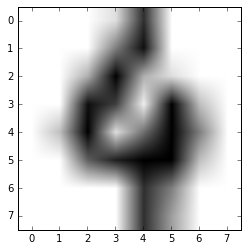

In [8]:
plt.imshow(digits.images[100,:,:], cmap='binary')

In [9]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components = 2)

In [15]:
pca.fit(digits.data)

PCA(copy=True, n_components=2, whiten=False)

In [16]:
digits_2D = pca.transform(digits.data)

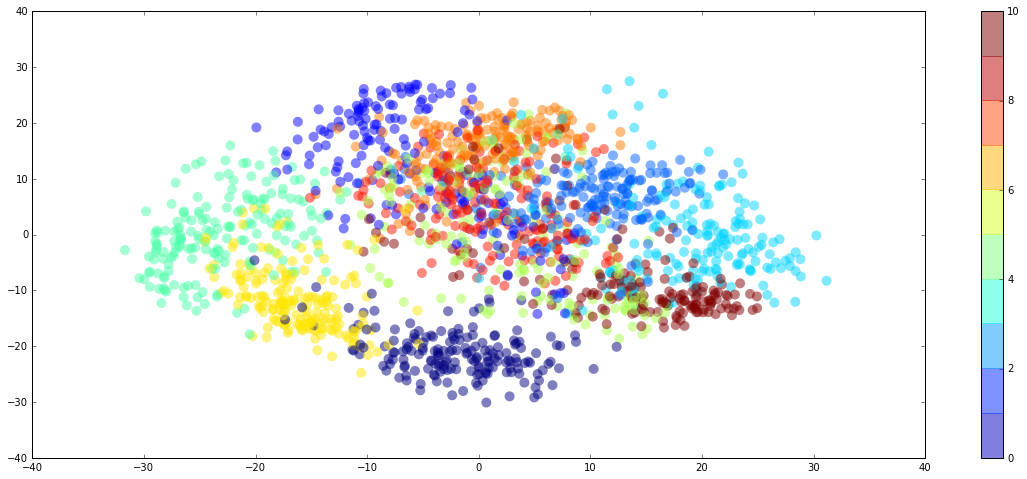

In [38]:
plt.figure(figsize=(20,8))

plt.scatter(digits_2D[:,0], digits_2D[:,1], c = digits.target, s = 100, alpha = 0.5, lw = 0)
plt.colorbar(boundaries  = range(0,11))

In [32]:
# Fake dataset
N = 100
x = np.random.rand(100)

In [33]:
x

array([ 0.20063078,  0.82449614,  0.04356587,  0.47469749,  0.77508443,
        0.63222531,  0.27165218,  0.15435983,  0.66730381,  0.17247207,
        0.61109331,  0.5936269 ,  0.35987707,  0.24526291,  0.56785992,
        0.34124342,  0.57778583,  0.93473685,  0.27602887,  0.89406614,
        0.47332811,  0.13254257,  0.5285404 ,  0.60328758,  0.68988908,
        0.86406306,  0.15857852,  0.21747881,  0.51114015,  0.80090741,
        0.74124016,  0.71681264,  0.86978779,  0.33133351,  0.71287123,
        0.78427638,  0.87836389,  0.36115675,  0.19447715,  0.14227939,
        0.16166418,  0.83906242,  0.67112942,  0.27592121,  0.58473073,
        0.39265029,  0.27335727,  0.58436456,  0.19994872,  0.63141574,
        0.14002864,  0.93452542,  0.14933625,  0.37698979,  0.14417209,
        0.74380872,  0.45251255,  0.61631466,  0.06075084,  0.78462784,
        0.36187435,  0.84792829,  0.0590228 ,  0.90587345,  0.07429368,
        0.83740377,  0.49308639,  0.31549374,  0.0287158 ,  0.19

## 5 - 8

In [39]:
fives = digits.data[digits.target == 5]
eights = digits.data[digits.target == 8]

In [40]:
pca2 = PCA(n_components= 2)

In [50]:
five_eights = np.vstack((fives,eights))
fives_eights_2D = pca2.fit_transform(five_eights)

In [51]:
fives_target = digits.target[digits.target == 5]
eights_target = digits.target[digits.target == 8]
targets = np.array([0 for _ in fives]+ [1 for _ in eights])

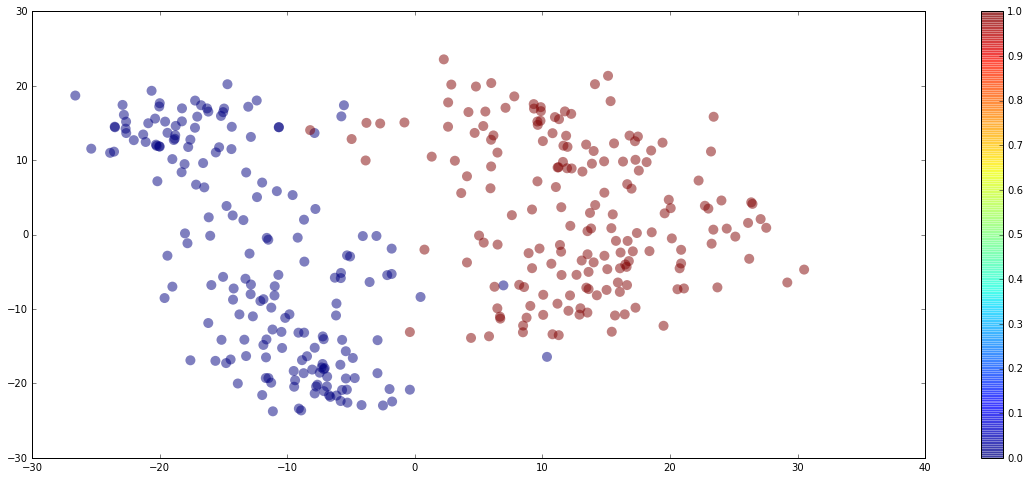

In [56]:
## plot
plt.figure(figsize=(20,8))

plt.scatter(fives_eights_2D[:,0], fives_eights_2D[:,1], c = targets, s = 100, alpha = 0.5, lw = 0)
plt.colorbar()

### Do the PCA computation ourseves 

$$ argmax_{||\omega|| = 1} = ||X\omega||^2 $$

In [57]:
X = np.matrix(digits.data)

In [59]:
A = X.T * X

In [61]:
evals, evecs = np.linalg.eig(A)

In [63]:
evals[0]

4809772.4255890977

In [64]:
evecs[:5,0]

matrix([[ 0.        ],
        [-0.00577193],
        [-0.10069602],
        [-0.22964187],
        [-0.22962908]])

In [69]:
v = pca.components_[0,:]

In [73]:
w = A * v.reshape(64,1)

In [76]:
w[1] / v[1]

matrix([[ 311062.27987698]])

In [ ]:
pca.components_.shape